# Stock Portfolio Optimization Tool Using AI

# Data exploration

In [2]:
#loads required packages
%load_ext watermark

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import ipywidgets as w
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import zipline
import warnings
import pyfolio as pf
import empyrical as ep
from yahoofinancials import YahooFinancials
from datetime import datetime
from dateutil.relativedelta import relativedelta

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [3]:


#dataFileName = input("Please enter the name of the data file.")
#print(dataFileName)

#stock_data = pd.read_csv("Stocks/"+dataFileName+".csv")
stock_data = pd.read_csv("Stocks/prices.csv")
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
stock_data.dropna()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
stock_data.isnull()

,date,symbol,open,close,low,high,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
851259,False,False,False,False,False,False,False
851260,False,False,False,False,False,False,False
851261,False,False,False,False,False,False,False
851262,False,False,False,False,False,False,False


In [6]:
stock_data.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [8]:
stock_data.tail(n=2)

,date,symbol,open,close,low,high,volume
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.59,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.48,705100.0


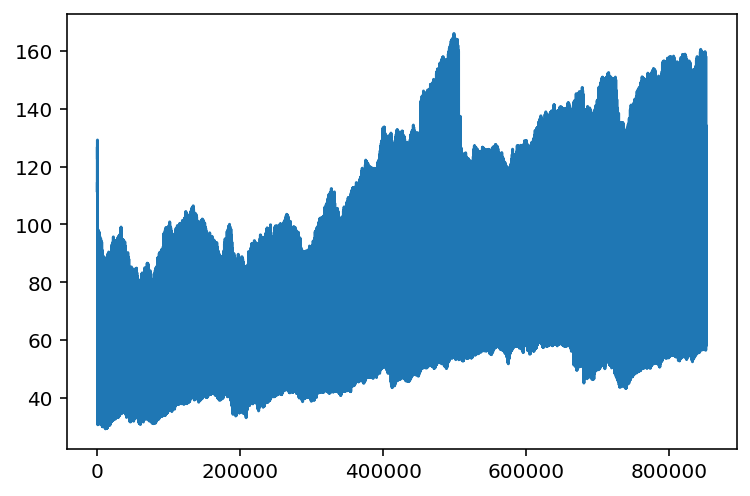

In [9]:
stock_data['open'].rolling(25).mean().plot()

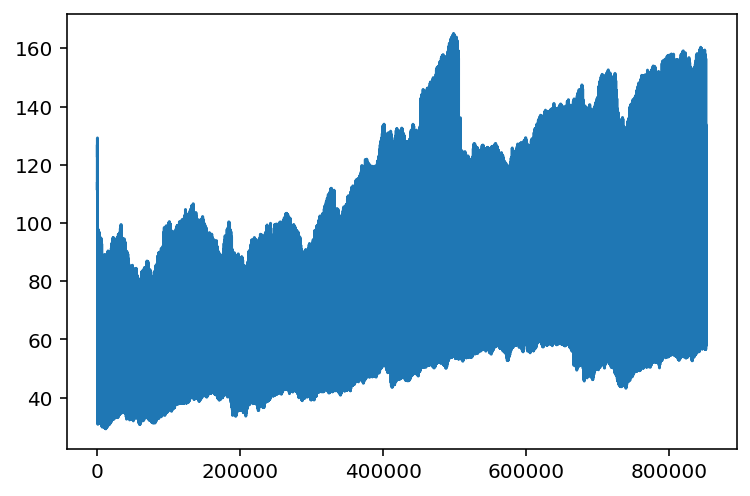

In [10]:
stock_data['close'].rolling(25).mean().plot()

In [11]:
stock_data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

# Markowitz

In [12]:
# https://towardsdatascience.com/algorithmic-trading-based-on-mean-variance-optimization-in-python-62bdf844ac5b

#selects the assets that are to be used in the portfolio
tickers = ['FB','AAPL','TSLA','BP']

yahoo_financials = YahooFinancials(tickers)

import ipywidgets as w
start_date_widget = w.DatePicker(description='Start Date')
end_date_widget = w.DatePicker(description='End Date')
display(start_date_widget, end_date_widget)






DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

ValueError: year 20202 is out of range

In [15]:
start_date = str(start_date_widget.value)
end_date = str(end_date_widget.value)
print(start_date, end_date)

2005-01-01 2020-01-01


In [16]:
data = yahoo_financials.get_historical_price_data(start_date,end_date,'daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in tickers
})



prices_df.index.name="formatted_date"
prices_df.index = pd.to_datetime(prices_df.index)
prices_df.head()

,FB,AAPL,TSLA,BP
formatted_date,,,,
2012-05-18,38.230000,65.770210,27.559999,23.393652
2012-05-21,34.029999,69.601997,28.770000,23.778296
2012-05-22,31.000000,69.067520,30.799999,23.866570
2012-05-23,32.000000,70.752777,31.020000,23.910711
2012-05-24,33.029999,70.102989,30.280001,24.106182


In [17]:
prices_df.columns

Index(['FB', 'AAPL', 'TSLA', 'BP'], dtype='object')

Text(0.5, 0, 'Date')

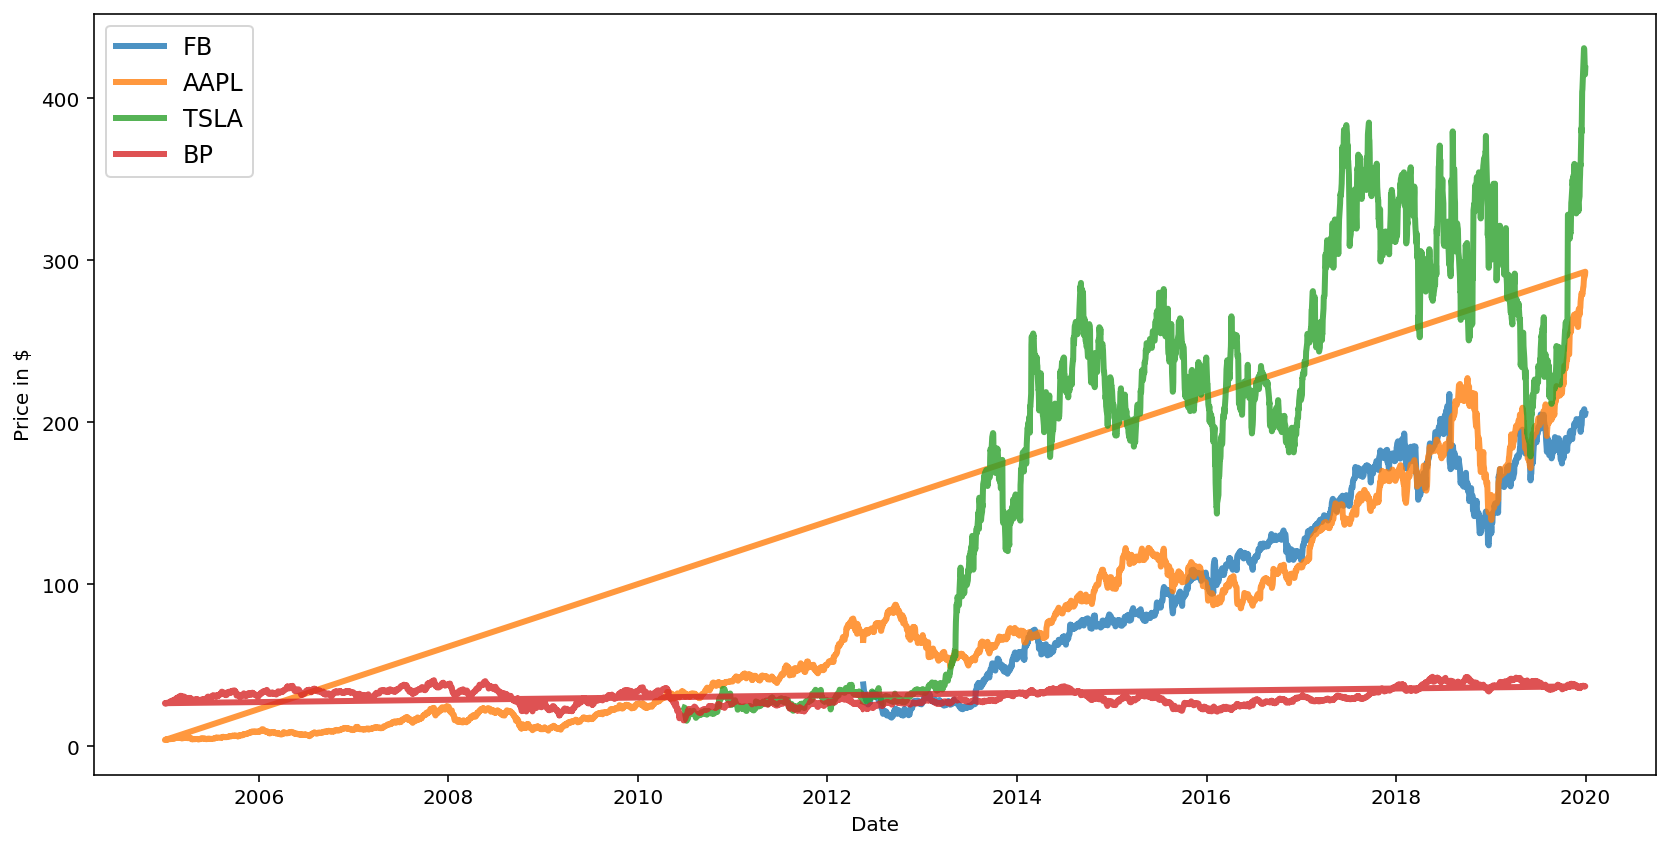

In [18]:

plt.figure(figsize=(14,7))
for c in prices_df.columns.values:
    plt.plot(prices_df.index,prices_df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.xlabel('Date')


Text(0, 0.5, 'Daily Returns')

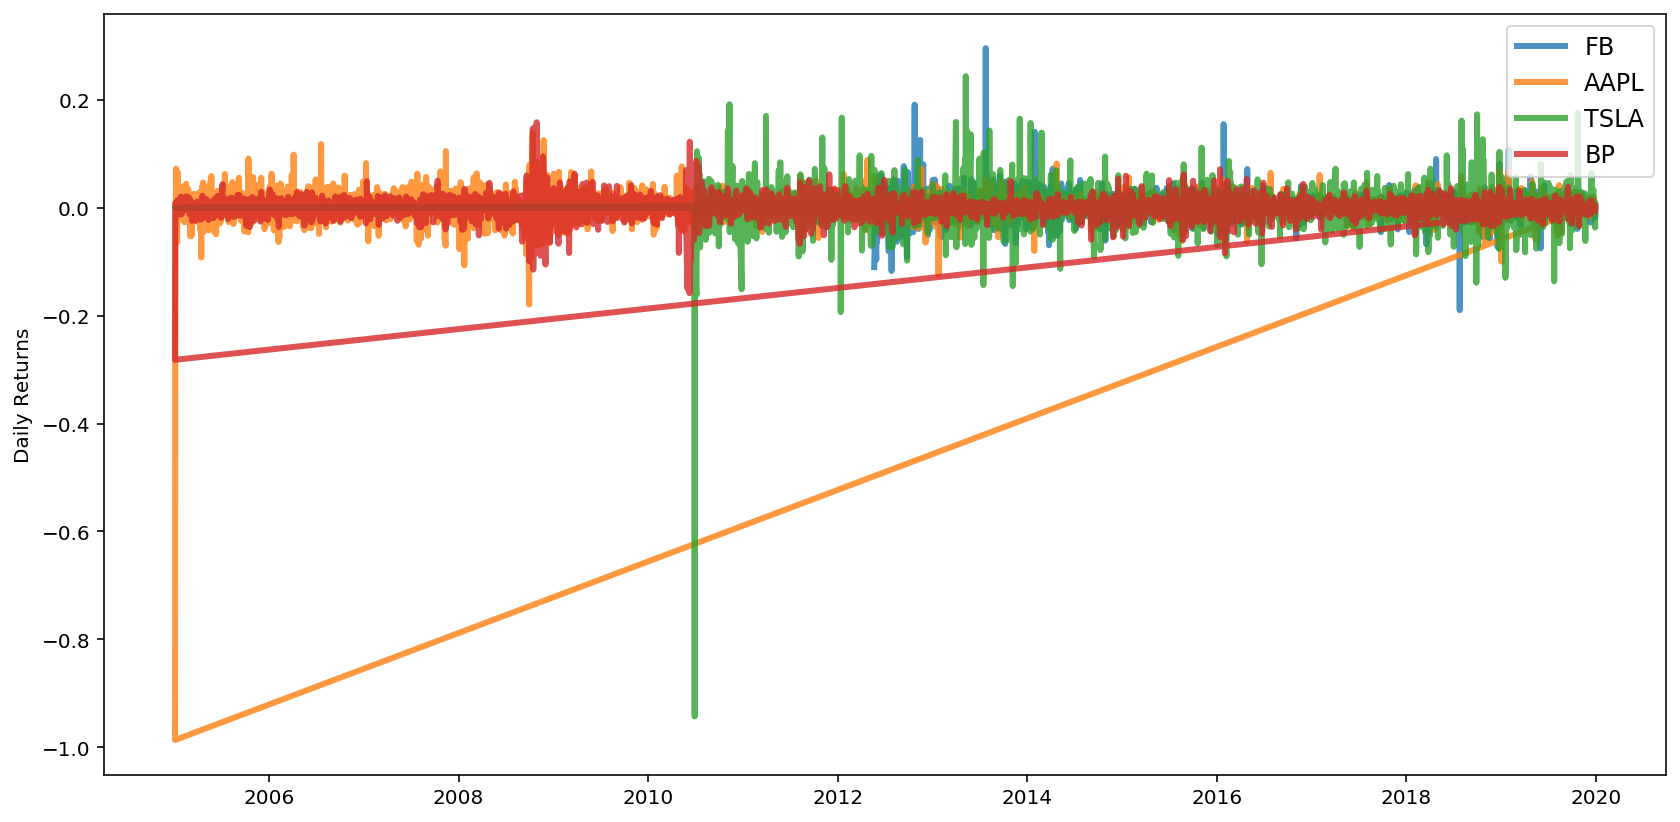

In [19]:
returns = prices_df.pct_change()

plt.figure(figsize=(14,7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right',fontsize=12)
plt.ylabel('Daily Returns')

In [ ]:
# https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

In [20]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [21]:
returns = prices_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [22]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=prices_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]

    max_sharpe_allocation.allocation
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=prices_df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print (prices_df)

    
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.21
Annualised Volatility: 0.23


               FB  AAPL   TSLA    BP
allocation  44.42  38.2  17.17  0.22
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.12
Annualised Volatility: 0.19


               FB  AAPL  TSLA    BP
allocation  48.24  7.31  8.35  36.1
                       FB       AAPL       TSLA         BP
formatted_date                                            
2012-05-18      38.230000  65.770210  27.559999  23.393652
2012-05-21      34.029999  69.601997  28.770000  23.778296
2012-05-22      31.000000  69.067520  30.799999  23.866570
2012-05-23      32.000000  70.752777  31.020000  23.910711
2012-05-24      33.029999  70.102989  30.280001  24.106182
...                   ...        ...        ...        ...
2012-05-11            NaN  7

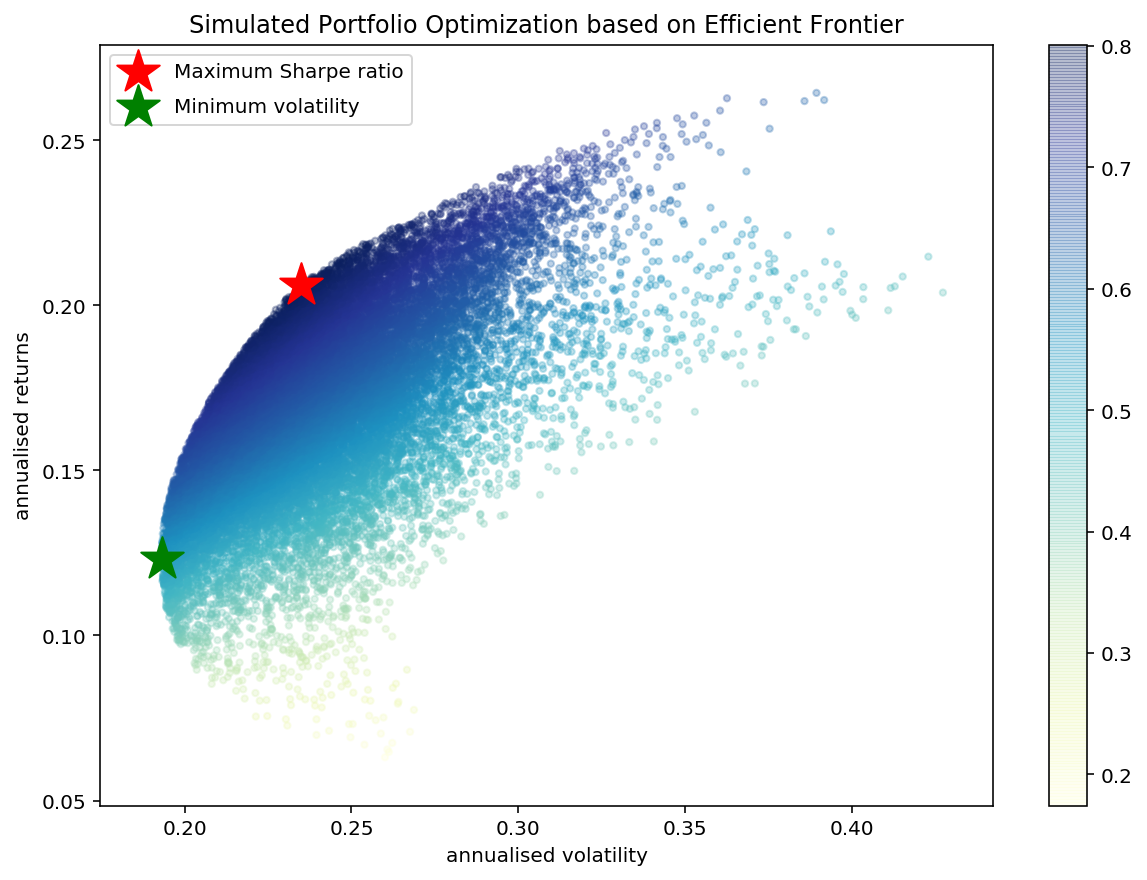

In [23]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
prices_df.columns

In [24]:
from pandas_datareader import data as pdr
portfolioValueDf = pdr.get_data_yahoo(tickers,
                          start_date,
                          end_date
                          )


totalToInvest = 100000
cash = totalToInvest

prices_df['Total']=0

i = 0
for tick in tickers:
   prices_df['Total']=prices_df['Total']+prices_df[tick]*weights[i]


NameError: name 'weights' is not defined

In [25]:
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.show()

NameError: name 'multpl_stock_monthly_returns' is not defined

<Figure size 432x288 with 0 Axes>

# Algorithm 

In [ ]:
# https://www.tensorflow.org/tensorboard/get_started
# https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

In [26]:
%load_ext tensorboard

In [27]:
import tensorflow as tf
import datetime
from yahoofinancials import YahooFinancials as yf
import pandas as pd

In [28]:
risky_assets = ['FB','AAPL','TSLA','BP']

yahoo_financials = YahooFinancials(risky_assets)
data = yahoo_financials.get_historical_price_data('2019-01-01','2019-09-30','daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in risky_assets
})



prices_df.index.name="formatted_date"
prices_df.index = pd.to_datetime(prices_df.index)

In [ ]:
stocks = prices_df.copy()

stocks.dtypes

In [ ]:
stocks.head

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
tickers = ['FB','AAPL','TSLA','BP']

import ipywidgets as w
start_date_widget = w.DatePicker(description='Start Date')
end_date_widget = w.DatePicker(description='End Date')
display(start_date_widget, end_date_widget)



In [ ]:
start_date = str(start_date_widget.value)
end_date = str(end_date_widget.value)
print(start_date, end_date)

In [ ]:
yahoo_finacials = yf(tickers)
data = yahoo_finacials.get_historical_price_data(start_date, end_date, "daily")


keys = ['formatted_date','open','adjclose','high']
prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['open'] for x in data[asset]['prices']} for asset in tickers
})

In [ ]:
prices_df

In [ ]:
print(data)

In [ ]:
from pandas import json_normalize
df = pd.DataFrame.from_dict(json_normalize(data),orient='columns').T


In [ ]:
df

In [29]:
import ipywidgets as w
ticker = input("Please enter a ticker here. I.e. BP.")
start_date_widget = w.DatePicker(description='Start Date')
end_date_widget = w.DatePicker(description='End Date')
display(start_date_widget, end_date_widget)
#start_date = '2010-01-01'
#end_date = '2020-01-01'




Please enter a ticker here. I.e. BP.BP


DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

In [30]:
start_date = str(start_date_widget.value)
end_date = str(end_date_widget.value)
print(start_date, end_date)

1997-12-01 2019-01-01


In [31]:
yahoo_finacials = yf(ticker)
data = yahoo_finacials.get_historical_price_data(start_date, end_date, "daily")

data

{'BP': {'eventsData': {'dividends': {'1998-05-13': {'amount': 0.719,
     'date': 895066200,
     'formatted_date': '1998-05-13'},
    '2006-08-09': {'amount': 0.5895,
     'date': 1155130200,
     'formatted_date': '2006-08-09'},
    '1998-02-18': {'amount': 0.704,
     'date': 887812200,
     'formatted_date': '1998-02-18'},
    '2002-08-14': {'amount': 0.36,
     'date': 1029331800,
     'formatted_date': '2002-08-14'},
    '1998-08-12': {'amount': 0.731,
     'date': 902928600,
     'formatted_date': '1998-08-12'},
    '2018-11-08': {'amount': 0.615,
     'date': 1541687400,
     'formatted_date': '2018-11-08'},
    '2009-11-10': {'amount': 0.84,
     'date': 1257863400,
     'formatted_date': '2009-11-10'},
    '2011-05-11': {'amount': 0.42,
     'date': 1305120600,
     'formatted_date': '2011-05-11'},
    '2013-11-06': {'amount': 0.57,
     'date': 1383748200,
     'formatted_date': '2013-11-06'},
    '2015-05-06': {'amount': 0.6,
     'date': 1430919000,
     'formatted_date': 

In [32]:
userInput_df = pdr.get_data_yahoo(ticker,
                          start_date,
                          end_date
                          )
userInput_df.head()
userInput_df=userInput_df.Close
userInput_df.head()

Date
1997-12-01    40.87500
1997-12-02    41.18750
1997-12-03    41.84375
1997-12-04    42.03125
1997-12-05    43.18750
Name: Close, dtype: float64

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

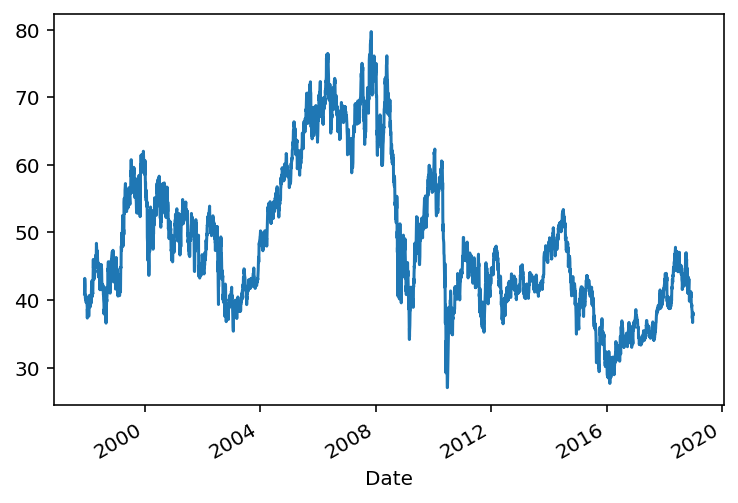

In [33]:
userInput_df.plot()

In [34]:
X = userInput_df.values
train_size = int(len(X)*0.66)
train, test = X[1:train_size], X[train_size:]

RMSE: 0.558


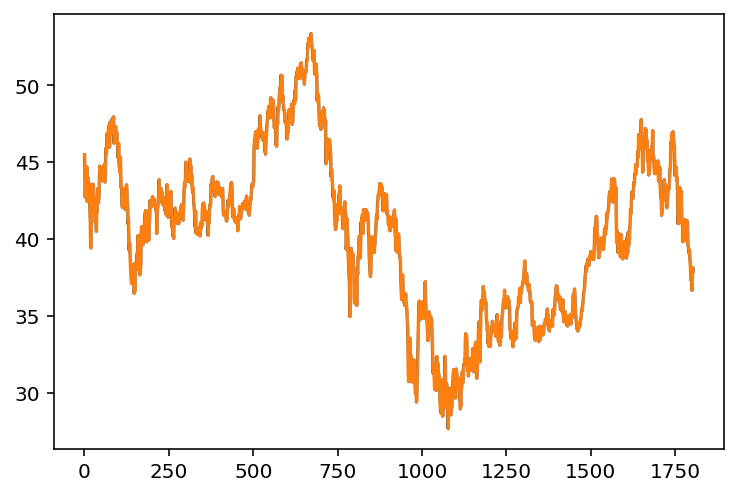

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    predictions.append(history[-1])
    history.append(test[i])
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions)
plt.show()

#this graph I believe is predicting the volume of trades over time
#I am not sure what the orange line is as of yet